## Use Case 3: Comparing BMI above and below 25 across the proteomics data

These are the tools we will use to play with the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is the data we will be playing with

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptome Data...
Loading CNA Data...
Loading Phosphoproteomics Data...


Use case 3: BMI above and below 25
The first step is to load the clinical dataframe and the dataframe to compare it with

In [3]:
clinical = CPTAC.get_clinical()
cna = CPTAC.get_CNA() #TODO: this will eventually be proteomics once we figure out how to meld indices

Next we will use the compare_clinical() function to create a dataframe that appends a column from the clinical dataframe to our chosen dataframe

In [4]:
bmiCNA = CPTAC.compare_clinical(clinical, cna, 'BMI')
print(bmiCNA)

             BMI      A1BG    A1CF  A3GALT2  A4GALT   A4GNT    AAAS      AACS  \
C3L-00006  38.88 -0.016500 -0.0496  -0.0211 -0.0173 -0.0256 -0.0236 -0.022800   
C3L-00008  39.76  0.055300 -0.0276   0.0251  0.0112 -0.0014  0.0424  0.019400   
C3L-00032  51.19  0.020000 -0.0043   0.0040  0.0033 -0.0065  0.0148 -0.003100   
C3L-00090  32.69 -0.113100  0.3200  -0.1264 -0.1153 -0.1048 -0.1133 -0.113300   
C3L-00098  20.28  1.086400  0.2603   0.0164  0.3146  0.2986 -0.3513 -0.350100   
C3L-00136  55.67 -0.040100  0.3687  -0.0395 -0.0434 -0.0787 -0.0243 -0.040500   
C3L-00137  25.68  0.009100 -0.0089  -0.0103 -0.0482 -0.0128  0.0259 -0.058300   
C3L-00139  21.57  0.505200 -0.2510  -0.2232 -0.2371  0.5171  0.0235 -0.199600   
C3L-00143  34.26 -0.023400 -0.0023  -0.0052  0.0219 -0.0017  0.0041  0.015100   
C3L-00145  36.57  0.024600  0.0247   0.0212  0.0347  0.0140  0.0428  0.018500   
C3L-00156  27.83 -0.070700  0.0292   0.0308  0.0010  0.0232  0.0331  0.018700   
C3L-00157  34.84  0.105800 -

Now we can split the bmiCNA dataframe into two dataframes based on whether the patient has a BMI (or whatever variable was specified in the previous step) above or below 25.
This is done by using the dataframe logic to create an array of boolean values, which we can then use to select the respective dataframes

In [5]:
greaterBool = bmiCNA['BMI'] >= 25
lessBool = bmiCNA['BMI'] < 25

largerThan25 = bmiCNA[greaterBool]
smallerThan25 = bmiCNA[lessBool]
print(largerThan25)
print(smallerThan25)

             BMI      A1BG    A1CF  A3GALT2  A4GALT   A4GNT    AAAS      AACS  \
C3L-00006  38.88 -0.016500 -0.0496  -0.0211 -0.0173 -0.0256 -0.0236 -0.022800   
C3L-00008  39.76  0.055300 -0.0276   0.0251  0.0112 -0.0014  0.0424  0.019400   
C3L-00032  51.19  0.020000 -0.0043   0.0040  0.0033 -0.0065  0.0148 -0.003100   
C3L-00090  32.69 -0.113100  0.3200  -0.1264 -0.1153 -0.1048 -0.1133 -0.113300   
C3L-00136  55.67 -0.040100  0.3687  -0.0395 -0.0434 -0.0787 -0.0243 -0.040500   
C3L-00137  25.68  0.009100 -0.0089  -0.0103 -0.0482 -0.0128  0.0259 -0.058300   
C3L-00143  34.26 -0.023400 -0.0023  -0.0052  0.0219 -0.0017  0.0041  0.015100   
C3L-00145  36.57  0.024600  0.0247   0.0212  0.0347  0.0140  0.0428  0.018500   
C3L-00156  27.83 -0.070700  0.0292   0.0308  0.0010  0.0232  0.0331  0.018700   
C3L-00157  34.84  0.105800 -0.0189   0.0831  0.0302  0.5225  0.7258  0.064375   
C3L-00161  68.39 -0.028700 -0.0176  -0.0284 -0.0154 -0.0178 -0.0158 -0.020600   
C3L-00356  25.37 -0.526000  

We can now apply the mean() function to these two dataframes to produce an array of mean values for each column in our dataframe (e.g. each gene)

In [6]:
largerMean = largerThan25.mean()
smallerMean = smallerThan25.mean()
print(largerMean)
print(smallerMean)

BMI         36.998929
A1BG        -0.013612
A1CF         0.074207
A3GALT2      0.003198
A4GALT      -0.031533
A4GNT        0.065043
AAAS         0.059840
AACS         0.030910
AADAC        0.020430
AADACL2      0.020430
AADACL3     -0.000311
AADACL4      0.002737
AADAT       -0.046840
AAED1       -0.050157
AAGAB       -0.040177
AAMDC       -0.004676
AAMP         0.049456
AANAT        0.022375
AAR2         0.059200
AARD         0.083702
AARS        -0.008437
AARSD1      -0.012890
AASDH       -0.050483
AASDHPPT    -0.034460
AASS         0.035796
AATF        -0.019057
AATK         0.029132
ABAT         0.005301
ABCA1       -0.052498
ABCA10      -0.028360
              ...    
ZSCAN22     -0.013845
ZSCAN23      0.001246
ZSCAN25      0.054595
ZSCAN26      0.000862
ZSCAN29     -0.057979
ZSCAN30     -0.013952
ZSCAN31      0.001246
ZSCAN32     -0.003618
ZSCAN4      -0.049579
ZSCAN5A     -0.029811
ZSCAN5B     -0.029811
ZSCAN9       0.003706
ZSWIM1       0.069004
ZSWIM2       0.012167
ZSWIM3    

Now we subtract one dataframe from the other and take the absolute value

We should also get ride of the BMI value, as a mean difference for the BMI has no meaning here (this can be done in previous steps with both dataframes if you prefer)

In [7]:
difference = abs(largerMean - smallerMean)

difference = difference[1:]
print(difference)

A1BG        0.122484
A1CF        0.052234
A3GALT2     0.012261
A4GALT      0.051539
A4GNT       0.034984
AAAS        0.067595
AACS        0.078216
AADAC       0.065570
AADACL2     0.065570
AADACL3     0.002798
AADACL4     0.005846
AADAT       0.114869
AAED1       0.094670
AAGAB       0.070386
AAMDC       0.066615
AAMP        0.017753
AANAT       0.044552
AAR2        0.079264
AARD        0.073270
AARS        0.072727
AARSD1      0.005800
AASDH       0.065862
AASDHPPT    0.093285
AASS        0.026887
AATF        0.255621
AATK        0.013796
ABAT        0.025853
ABCA1       0.096811
ABCA10      0.002765
ABCA12      0.013517
              ...   
ZSCAN22     0.122718
ZSCAN23     0.005265
ZSCAN25     0.107895
ZSCAN26     0.004880
ZSCAN29     0.003048
ZSCAN30     0.023171
ZSCAN31     0.005265
ZSCAN32     0.036936
ZSCAN4      0.119333
ZSCAN5A     0.071520
ZSCAN5B     0.068735
ZSCAN9      0.007724
ZSWIM1      0.000124
ZSWIM2      0.011902
ZSWIM3      0.000124
ZSWIM4      0.122050
ZSWIM5      0

The final step is to create a histogram of our mean difference values

C:\Users\David\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


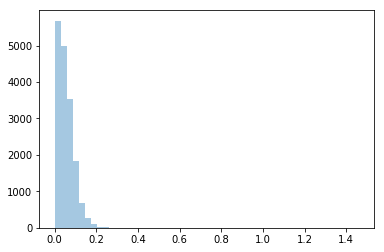

In [10]:
#TODO is this the plot we want?
sns.distplot(difference, kde=False)
plt.show()